<a href="https://colab.research.google.com/github/shivamarora1209/Machine-Learning/blob/main/Implementing_Polynomial_Regression_using_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##POLYNOMIAL REGRESSION

###Importing required Libraries

In [129]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [106]:
dataset = pd.read_csv('data_w3_ex1.csv')
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:, -1]

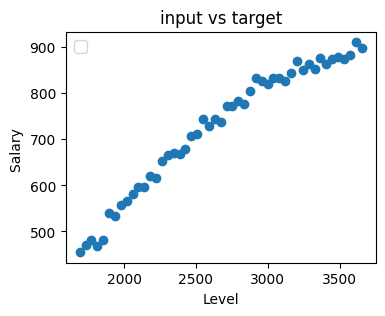

In [107]:
fig, ax = plt.subplots(1, 1, figsize=(4,3))
ax.scatter(X, Y)
ax.set_title("input vs target")
ax.set_xlabel('Level')
ax.set_ylabel('Salary ')
ax.legend(fontsize = 12)
plt.show()

In [108]:
X_train, X_, Y_train, Y_ = train_test_split(X, Y, test_size = 0.4, random_state = 1)
X_cv, X_test, Y_cv, Y_test = train_test_split(X_, Y_, test_size = 0.5, random_state = 1)

del X_, Y_

print(f"the shape of the training set (input) is: {X_train.shape}")
print(f"the shape of the training set (target) is: {Y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {X_cv.shape}")
print(f"the shape of the cross validation set (target) is: {Y_cv.shape}\n")
print(f"the shape of the test set (input) is: {X_test.shape}")
print(f"the shape of the test set (target) is: {Y_test.shape}")

the shape of the training set (input) is: (29, 1)
the shape of the training set (target) is: (29,)

the shape of the cross validation set (input) is: (10, 1)
the shape of the cross validation set (target) is: (10,)

the shape of the test set (input) is: (10, 1)
the shape of the test set (target) is: (10,)


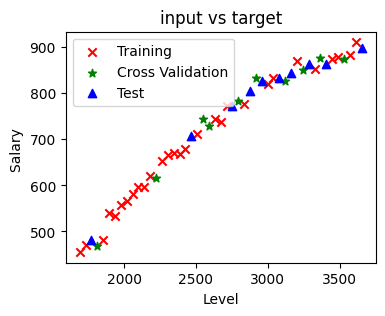

In [109]:
fig, ax = plt.subplots(1, 1, figsize=(4,3))
plt.scatter(X_train, Y_train, marker = 'x', c = 'r', label = 'Training')
plt.scatter(X_cv, Y_cv, marker = '*', c = 'g', label = 'Cross Validation')
plt.scatter(X_test, Y_test, marker = '^', c = 'b', label = 'Test')
plt.title('input vs target')
plt.xlabel('Level')
plt.ylabel('Salary ')
plt.legend()
plt.show()

Computed mean of the training set: 2529.25
Computed standard deviation of the training set: 578.48



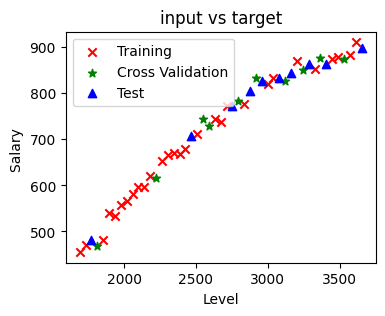

In [110]:
linear_scaler = StandardScaler()
X_train_scaled = linear_scaler.fit_transform(X_train)

print(f"Computed mean of the training set: {linear_scaler.mean_.squeeze():.2f}")
print(f"Computed standard deviation of the training set: {linear_scaler.scale_.squeeze():.2f}\n")

fig, ax = plt.subplots(1, 1, figsize=(4,3))
plt.scatter(X_train, Y_train, marker = 'x', c = 'r', label = 'Training')
plt.scatter(X_cv, Y_cv, marker = '*', c = 'g', label = 'Cross Validation')
plt.scatter(X_test, Y_test, marker = '^', c = 'b', label = 'Test')
plt.title('input vs target')
plt.xlabel('Level')
plt.ylabel('Salary ')
plt.legend()
plt.show()

###Applying Linear Regression Model

In [111]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, Y_train)

LinearRegression()

In [112]:
yhat = linear_model.predict(X_train)

print(f"Training MSE : {mean_squared_error(Y_train, yhat) / 2}")

Training MSE : 59772011429.70418


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


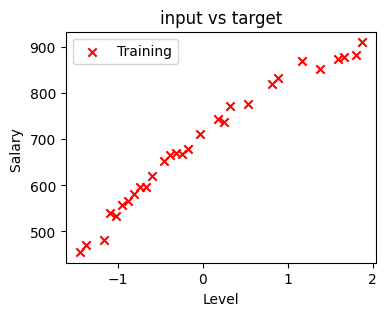

In [128]:
fig, ax = plt.subplots(1, 1, figsize=(4,3))
plt.scatter(X_train_scaled, Y_train, marker = 'x', c = 'r', label = 'Training')
plt.title('input vs target')
plt.xlabel('Level')
plt.ylabel('Salary ')
plt.legend()
plt.show()

In [113]:
X_cv_scaled = linear_scaler.transform(X_cv)

print(f"Mean used to scale the CV set: {linear_scaler.mean_.squeeze():.2f}")
print(f"Standard deviation used to scale the CV set: {linear_scaler.scale_.squeeze():.2f}")

yhat = linear_model.predict(X_cv_scaled)
print(f"Cross validation MSE: {mean_squared_error(Y_cv, yhat) / 2}")

Mean used to scale the CV set: 2529.25
Standard deviation used to scale the CV set: 578.48
Cross validation MSE: 634.8120035263684


##Applying Polynomial Features


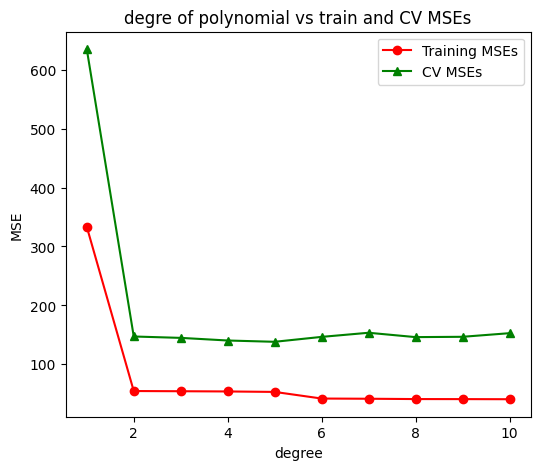

In [115]:
train_mses = []
cv_mses = []
models = []
polys = []
scalers = []

for degree in range(1,11):

    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(X_train)
    polys.append(poly)

    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)

    model = LinearRegression()
    model.fit(X_train_mapped_scaled, Y_train )
    models.append(model)

    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(Y_train, yhat) / 2
    train_mses.append(train_mse)

    X_cv_mapped = poly.transform(X_cv)
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(Y_cv, yhat) / 2
    cv_mses.append(cv_mse)

degrees=range(1, 11)
plt.subplots(1, 1, figsize=(6,5))
plt.plot(degrees, train_mses, marker = 'o', c = 'r', label = 'Training MSEs')
plt.plot(degrees, cv_mses, marker = '^', c = 'g', label = 'CV MSEs')
plt.title('degre of polynomial vs train and CV MSEs')
plt.xlabel('degree')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [116]:
degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE has been achieved at degree : {degree}")

Lowest CV MSE has been achieved at degree : 5


In [121]:
X_test_poly = polys[degree-1].transform(X_test)
X_test_poly_scaled = scalers[degree-1].transform(X_test_poly)

yhat = models[degree-1].predict(X_test_poly_scaled)
test_mse = mean_squared_error(yhat, Y_test) / 2

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Training MSE: 53.17
Cross Validation MSE: 138.23
Test MSE: 21.36
